
# Algo Quant Dev — Dijkstra (Plus court chemin pondéré)

Ce notebook te fait réviser **Dijkstra** : l’algo de référence pour le plus court chemin dans un graphe pondéré (distances, coûts, etc.).  
On s’en sert en finance : passage d’ordres optimaux, calculs sur réseaux de liquidité, routing optimal, arbitrage, etc.

---



## 1. Principe de Dijkstra

- Marche sur tout graphe orienté, pondéré, sans poids négatif.
- À chaque étape : on “étend” la distance minimale connue vers chaque sommet voisin non encore exploré.
- Utilise une structure de type “file de priorité” (heapq) pour toujours traiter le nœud le plus proche du point de départ.

---

**Application quant :** routing optimal dans les réseaux, book de taux, chemins de paiement interbancaires, best execution, etc.



## 2. Implémentation Python simple


In [1]:

import heapq

def dijkstra(graph, start):
    '''Renvoie la distance minimale depuis start vers chaque sommet'''
    dist = {v: float('inf') for v in graph}
    dist[start] = 0
    heap = [(0, start)]
    while heap:
        d, node = heapq.heappop(heap)
        if d > dist[node]: continue
        for neighbor, weight in graph[node]:
            if dist[neighbor] > d + weight:
                dist[neighbor] = d + weight
                heapq.heappush(heap, (dist[neighbor], neighbor))
    return dist

# Exemple :
graph = {
    'A': [('B',2), ('C',4)],
    'B': [('C',1), ('D',7)],
    'C': [('D',3)],
    'D': []
}
print("Dijkstra A->*", dijkstra(graph, 'A'))


Dijkstra A->* {'A': 0, 'B': 2, 'C': 3, 'D': 6}



### Version avec récupération du chemin optimal


In [2]:

def dijkstra_path(graph, start, goal):
    dist = {v: float('inf') for v in graph}
    prev = {v: None for v in graph}
    dist[start] = 0
    heap = [(0, start)]
    while heap:
        d, node = heapq.heappop(heap)
        if d > dist[node]: continue
        for neighbor, weight in graph[node]:
            if dist[neighbor] > d + weight:
                dist[neighbor] = d + weight
                prev[neighbor] = node
                heapq.heappush(heap, (dist[neighbor], neighbor))
    # Reconstruction du chemin
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = prev[node]
    path = path[::-1]
    return dist[goal], path

dist, path = dijkstra_path(graph, 'A', 'D')
print(f"Distance min A->D : {dist}, Chemin : {path}")


Distance min A->D : 6, Chemin : ['A', 'B', 'C', 'D']



## 3. Visualisation rapide du graphe

Pour illustrer le graphe et les poids (nécessite networkx & matplotlib)


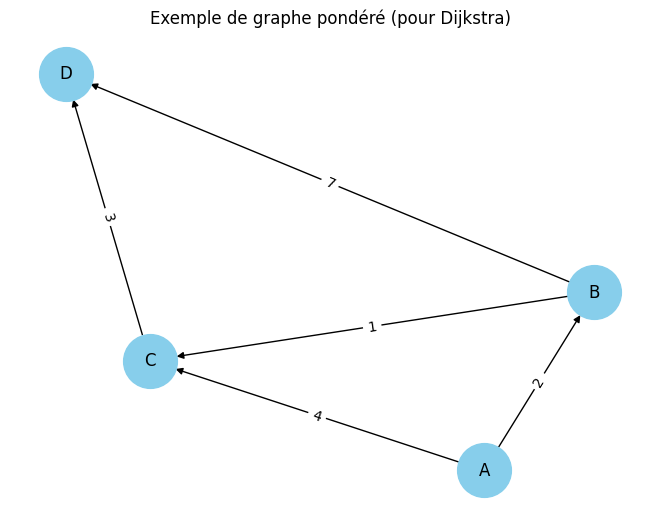

In [9]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for u in graph:
    for v, w in graph[u]:
        G.add_edge(u, v, weight=w)

pos = nx.spring_layout(G, seed=42)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Exemple de graphe pondéré (pour Dijkstra)")
plt.show()



## 4. Quiz oral / entretien

- Pourquoi Dijkstra ne fonctionne-t-il pas avec des poids négatifs ?
- Comment l’adapter à un graphe non orienté ?
- Application en trading : comment utiliser Dijkstra pour router un ordre à coût minimal sur plusieurs pools de liquidité ?
- Peut-on utiliser Dijkstra pour trouver le plus rapide chemin entre deux bourses reliées par plusieurs serveurs (latence, coût, risque) ?

---



## 5. Exercice à compléter (entraînement)

**Construis un graphe représentant 5 places de marché FX, avec des taux de change bidirectionnels (et des coûts différents),  
et utilise Dijkstra pour trouver le plus court chemin de conversion EUR à JPY.**

(Peut être à la main ou avec la méthode ci-dessus)
